### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [26]:
bcancer = load_breast_cancer(as_frame=True)
print(bcancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
X = bcancer.data
y = bcancer.target # 1 if benign, 0 if malignant

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)
X_train_scaled = mmscaler.transform(X_train)
X_test_scaled = mmscaler.transform(X_test)

In [31]:
knnc = KNeighborsClassifier()
knnc.fit(X_train_scaled, y_train)
knnc.score(X_test_scaled, y_test)

0.986013986013986

2) Repeat Step 1 using pipelines and report the score.

In [32]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.986013986013986

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'estimator__n_neighbors' : np.arange(1,20)}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [50]:
grid.score(X_test, y_test)

0.972027972027972

In [51]:
grid.best_params_

{'estimator__n_neighbors': 12}

4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [61]:
bike_day = pd.read_csv('data/bike_day_raw.csv')
X = bike_day.iloc[:,:-1]
y = bike_day.iloc[:, -1]
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


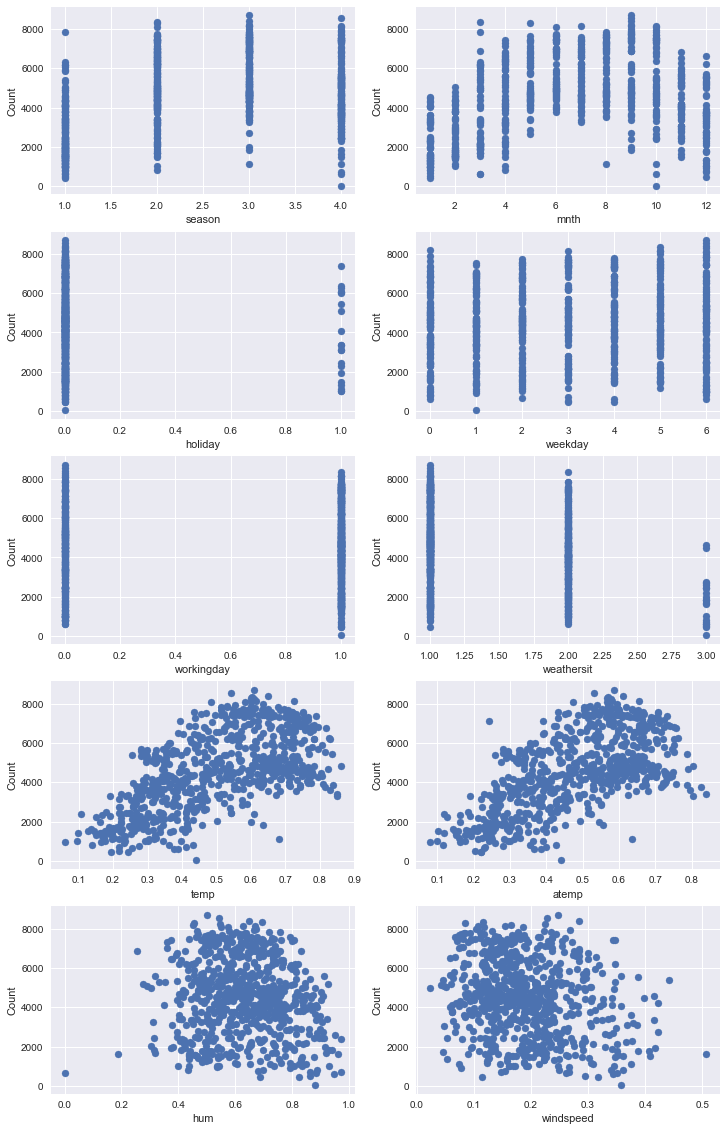

In [103]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(12,20))

for i,col in enumerate(bike_day.columns[:-1]):
    ax = fig.add_subplot(5,2,i+1)
    ax.set_ylabel('Count')
    ax.set_xlabel(bike_day.columns[i])
    ax.scatter(X[col], y)


In [70]:
num_feats = ['temp', 'atemp', 'hum', 'windspeed']
cat_feats = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [101]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

ctf = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
    ('num', num_pipe, num_feats)
])

pipe = Pipeline([
    ('transformer', ctf),
    ('estimator', KNeighborsRegressor())
])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5556835583690767